In [57]:
import scipy.stats as ss
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 在数学上沿用物理的名词，p(x)也称为概率密度函数

$如果函数p(x)满足下列两个条件（对应了概率的三大公理）：$
- 非负性：
$p(x) \ge 0$

- 规范性（暗含了可加性），因为是连续的，所以通过积分相加：
$\int_{-\infty}^{+\infty}p(x)\mathrm{d}x=1$

$则称其为\color{Salmon}{概率密度函数}（Probability Density Function，简写为PDF）。$

## 连续随机变量的期望:
$E(X)=\int_{-\infty}^{+\infty}xp(x)\mathrm{d}x$

- 假设g(X)为连续随机变量X的某一函数，则：
$E\left[g(X)\right]=\int_{-\infty}^{+\infty}g(x)p(x)\mathrm{d}x$

- 若c为常数，则：
$E(c)=c$

- 数学期望满足：
  - 齐次性，对于任意常数a有：
$E(aX)=aE(X)$

  - 可加性，对于任意两个函数g_1(X)、g_2(X)有：
$E\left[g_1(X)+g_2(X)\right]=E\left[g_1(X)\right]+E\left[g_2(X)\right]$

## 方差的定义依然是：

- $Var(X)=E\left[\Big(X-E(X)\Big)^2\right]$

- 可以通过下式来化简运算：$Var(X)=E\left(X^2\right)-\mu^2$

- 若c为常数，则：
$Var(c)=0$

- 若a、b为常数，则：
$Var(aX+b)=a^2Var(X)$

## 因为期望、方差的性质对于连续随机变量也是成立的，所以之前证明过的

- 马尔可夫不等式：

$P(X\ge a)\le \frac{E(X)}{a}$

- 切比雪夫不等式：

$P(|X-\mu| \ge k)\le \frac{\sigma^2}{k^2}$

对于连续随机变量也是成立的。

## 对连续随机变量而言，因为单点的概率始终为0，所以累积分布函数更加常用：
$连续随机变量X的概率密度函数为p(x)，则：$
$F(x)=P(X \le x)=\int_{-\infty}^{x}p(t)\mathrm{d}t$

$称为X的\color{Salmon}{累积分布函数}。$

还有一个重要性质，根据微积分第一基本定理有：

$\frac{\mathrm{d}}{\mathrm{d}x}F(x)=p(x)$

# 2.1 连续概率分布 均匀分布 uniform

如果连续随机变量X的概率密度函数为：

$ p(x)=
\begin{cases}
    \frac{1}{b-a}, &a \le x \le b\\
    0, & 其它
\end{cases}$

$则称X服从区间(a,b)上的均匀分布，记作X\sim U(a,b)，其累积分布函数为：$


$F(x)=\begin{cases}
    0,&x < a\\
    \frac{x-a}{b-a},&a\le x < b\\
    1,&x \ge b
\end{cases}$

期望和方差分别为：

$E(X)=\frac{a+b}{2},\quad Var(X)=\frac{(b-a)^2}{12}$

In [15]:
def plotting(X,f_list, title):
    plt.plot(X,f_list)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("%s"%title)
    plt.show()

In [19]:
#定义随机变量x
a = 0
b = 10 

#定义随机变量的取值
X = np.arange(0,10,0.1)

In [20]:
# 输出概率密度
f_list = ss.uniform.pdf(X,a,b)

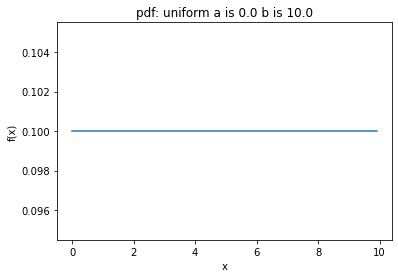

In [26]:
title = "pdf: uniform a is %0.1f b is %0.1f"%(a,b)
plotting(X, f_list, title=title)

In [24]:
# 计算x<2的概率
ss.uniform.cdf(2,a,b)

0.2

## 2.2 正态分布

如果连续随机变量X的概率密度函数为：
$p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}},\quad -\infty < x < +\infty$

$则称X服从\color{Salmon}{正态分布}（normal distribution），也称作\color{Salmon}{高斯分布}（Gaussian distribution），记作X\sim N(\mu,\sigma^2)，其累积分布函数为：$

$F(x)=\frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{(t-\mu)^2}{2\sigma^2}}\mathrm{d}t$

$我们称\mu=0、\sigma=1时的正态分布N(0,1)为\color{Salmon}{标准正态分布}。$

$通常记标准正态变量为Z（Z Score），记标准正态分布的概率密度函数为\phi(x)，累积分布函数为\Phi(x)，即：$

$\phi(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}},\quad -\infty < x < +\infty$

$\Phi(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{t^2}{2}}\mathrm{d}t$

$如果X\sim N(\mu, \sigma^2)，那么有：$
$aX+b\sim N(a\mu+b, a^2\sigma^2)$

$正态分布X\sim N(\mu,\sigma^2)的期望和方差为：$
$E(X)=\mu,\quad Var(X)=\sigma^2$

<img src="img/n1.png">

$ P(\mu-\sigma\le X\le \mu+\sigma)\approx 68.26\%$

<img src="img/n2.png">

<img src="img/example.png">
<img src="img/e2.png">

In [41]:
def norm(mu,sigma):
    #定义分布参数
    n = ss.norm(mu, sigma)
    return n

In [42]:
mu = 0
sigma = 1
# 生成随机变量
X = np.linspace(-5,5,200)

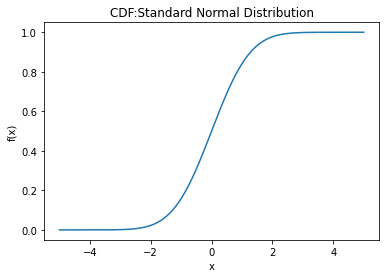

In [50]:
title = "CDF:Standard Normal Distribution"
plotting(X, test.cdf(X), title)

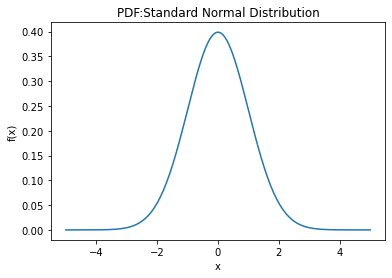

In [51]:
title = "PDF:Standard Normal Distribution"
plotting(X, test.pdf(X), title)

In [52]:
# 如何计算概率
p1=ss.norm.cdf(-2, mu, sigma)

In [53]:
p1

0.022750131948179195

In [54]:
p2 = ss.norm.cdf(2, mu, sigma)

In [55]:
p2

0.9772498680518208

## 正态分布近似替代二项分布

- 计算P(X≤a)形式的概率时，正态分布实际上需要计算P(X<a+0.5)
- 计算P(X≥b)形式的概率时，正态分布实际上需要计算P(X>b-0.5)
- 计算P(a≤X≤b)形式的概率时，正态分布实际上需要计算P(a-0.5<X<b+0.5)

## 正态分布代替泊松分布

- 随着λ变大，泊松分布图的外形看起来越来越像正态分布。当λ大于15时，就可以通过正态分布近似替代泊松分布，如X~ Po(λ)且λ>15，就可以用X~N(λ，λ)近似替代，同样别忘了连续性修正！

- z分布:就是标准正态分布 Z\sim N(0,1)Z∼N(0,1)

- scipy.stats.norm

- t分布:scipy.stats.t

- F分布:scipy.stats.f

- chi2分布:scipy.stats.chi2